<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2022) </h2>
<h2 align="center">Lab 6: Logistic Regression </h2>

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from logistic_func import *
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer

# Classification vs Regression

<img src="https://dataaspirant.com/wp-content/uploads/2014/09/Classification-and-Regression-dataaspirant.png" align = 'center' style="width: 1000px;">

# Linear Regression vs Logistic Regression

**Linear Function:**

$$z = x^T w$$
**Logistic Sigmoid:**

$$\sigma(z) = \frac{1}{1+e^{-z}}$$
**Apply Logistic Sigmoid to the Linear Function**

$$ h_θ(x) = \sigma(x^T w) = \frac{1}{1+e^{-x^T w}}$$

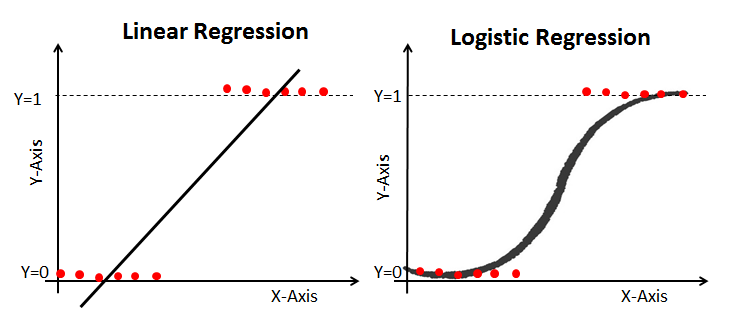

**Logistic Regression** classifies as positive when $P(C=positive | x_i)> 0.5$, that happens when $h_θ(x)> 0.5$, where$$h_θ(x) = \sigma (x_i^T w) = \frac{1}{1+e^{-x_i^T w}}$$ 

### **Logistic Loss**

let ${y}$ = training labels and ${h_θ(x)}$ = our estimate
<img src="https://miro.medium.com/max/2000/1*PT9WfxoXFuE-2yiYrEu9Zg.png" align = 'center' style="width: 800px;">
<img src="https://miro.medium.com/max/1400/1*_NeTem-yeZ8Pr9cVUoi_HA.png" align = 'center' style="width: 600px;">


**This can be represented by one equation as follows:**
<img src="https://miro.medium.com/max/1400/1*CQpbokNStSnBDA9MdJWU_A.png" align = 'center' style="width: 600px;">

**Derivative of Loss w.r.t weights ($w$):**
$$\nabla_w J(w) = \frac{1}{N}\sum_{i=1}^N (y_i - t_i)x_i$$


In [2]:
#Define sigmoid function
def sigmoid(z):
    #output > 0.5 when z is positive
    #output < 0.5 when z is negative
    return 1/(1+np.exp(-z))

In [3]:
x= np.arange(-20,20)
y= np.round(sigmoid(x),2)

Text(0, 0.5, 'Logistic/sigmoid function applied')

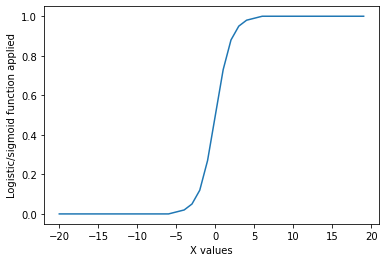

In [4]:
plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Logistic/sigmoid function applied')

# Classification using Sklearn Logistic Regression

# Titanic Dataset

We will be working on [the Titanic](https://www.kaggle.com/c/titanic/data?select=train.csv) dataset.
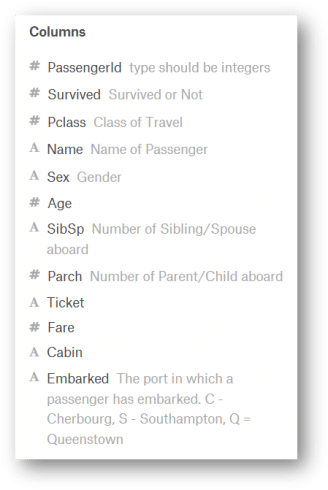

In [5]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data exploration

In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#check for null values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#check for duplicated values
titanic.duplicated().sum()

0

In [10]:
#is my dataset balanced?
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Some Statistics

### How many men and women were there?

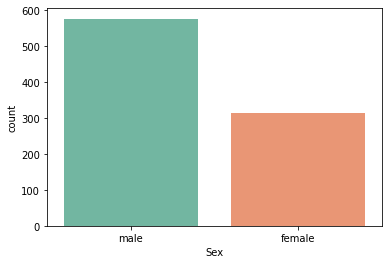

In [11]:
import seaborn as sns
sns.countplot(x='Sex', data=titanic, palette='Set2')
plt.show()

### Count of class


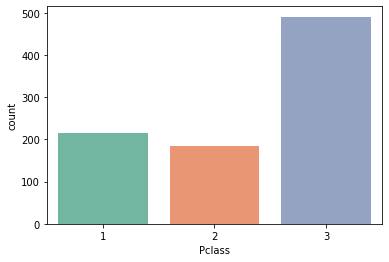

In [12]:
sns.countplot(x='Pclass', data=titanic, palette='Set2')
plt.show()

### How many people survived?

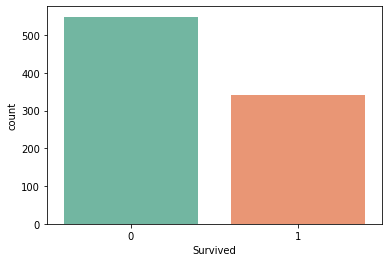

In [13]:
sns.countplot(x='Survived', data=titanic, palette='Set2')
plt.show()

### How many people survived per class?


<AxesSubplot:xlabel='Survived', ylabel='count'>

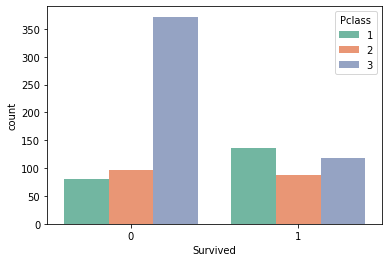

In [14]:
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='Set2') #-> box plot---

## Fare relation to Survival

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

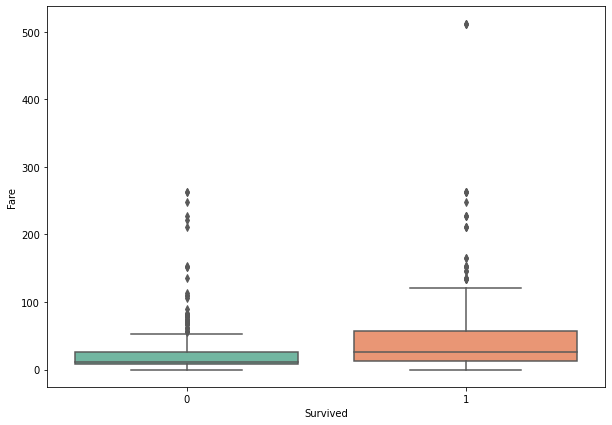

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Survived',y='Fare',data=titanic, palette='Set2')

### How many males and females survived?


<AxesSubplot:xlabel='Survived', ylabel='count'>

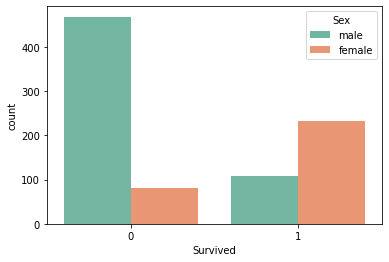

In [16]:
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='Set2')

### Age range of travellers

In [17]:
#age mean and median
age_mean= titanic['Age'].mean()
age_median= titanic['Age']. median()
age_mode = titanic['Age']. mode()
print("Mean of age= ", np.round(age_mean,2))
print("Median of age= ", np.round(age_median,2))
print("Mode of age= ", int(np.round(age_mode,2)))

Mean of age=  29.7
Median of age=  28.0
Mode of age=  24


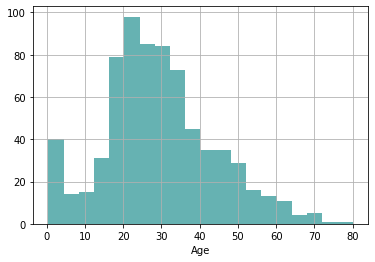

In [18]:
ax = titanic['Age'].hist(bins=20, color='teal', alpha=0.6)
ax.set(xlabel='Age')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

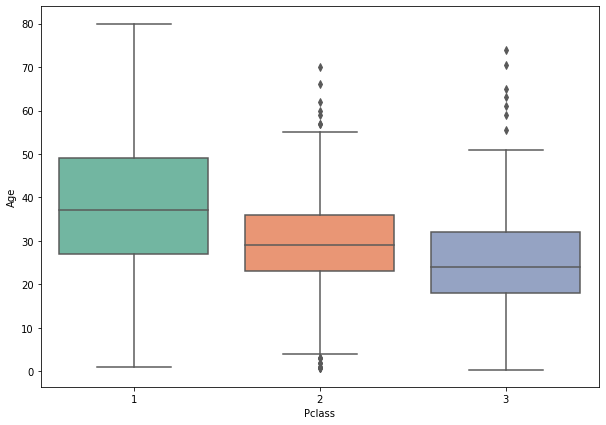

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic, palette='Set2')

**Observations:**
- We see that more males were on the ship than females. 
- Most people were travelling on class 3 (low)
- More people in the upper class survived than not. The opposite it true for the lower class.
- We see that more females survived than not. The opposite is true for males. 
- Most people were about 24 years old & the mean age was 29.25 years old.
- The age tends to increase with higher classes.

# Check relations between differnet variables

In [20]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

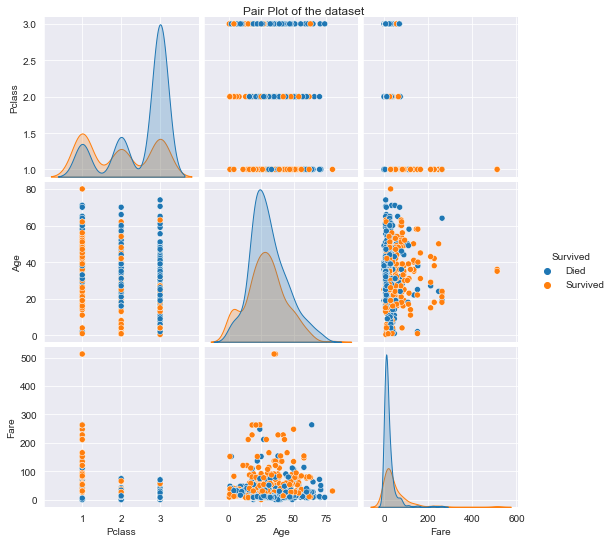

In [21]:
# view the relationships between variables; color code by species type
sns.set_style('darkgrid')
di = {0: 'Died', 1: 'Survived'}
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
pplot = sns.pairplot(titanic[cols].replace({"Survived": di}), hue='Survived')
pplot.fig.suptitle("Pair Plot of the dataset", y=1);

# Data cleaning
- We have 177 null values in the Age column, 2 in the embarked column and 687 in the cabin column.
- We have irrelevant features.
- We have categorical variables.

## Deal with Null values

#### Cabin

In [22]:
print('Percent of missing Cabin records is %.2f%%' %((titanic['Cabin'].isnull().sum()/titanic.shape[0])*100))

Percent of missing Cabin records is 77.10%


Since the majority of cabin records are missing, we will drop this column. 

In [23]:
titanic.drop('Cabin', axis=1, inplace=True)

#### Embarked

How do you suggest we impute the missing values of this feature?

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


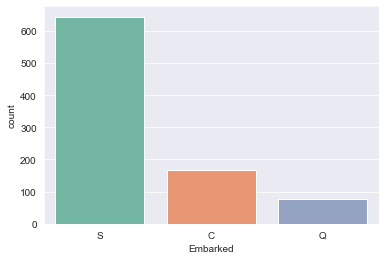

In [24]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(titanic['Embarked'].value_counts())
sns.countplot(x='Embarked', data=titanic, palette='Set2')
plt.show()

The majority of passengers boarded in Southhampton, so we'll impute the 2 NaN values with "S".

We can also just drop these 2 values.




In [25]:
print(titanic[titanic['Embarked'].isnull()])

print(titanic[titanic['Embarked'].isnull()].index)


     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN  
Int64Index([61, 829], dtype='int64')


In [26]:
titanic.shape

(891, 11)

In [27]:

#titanic.drop(titanic[titanic['Embarked'].isnull()].index,axis=0, inplace=True)

#titanic.shape


In [28]:
titanic['Embarked'].fillna('S', inplace=True)
titanic.shape

(891, 11)

#### Age

Since, the age is rights skewed (the tail to the right), it won't be effiecient to use the mean for filling the null values. Instead, we should use the median or the mode.

In [29]:
titanic_median_age= titanic.copy()
titanic_median_age['Age'].fillna(age_median, inplace= True)

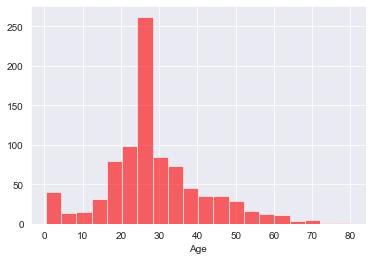

In [30]:
ax = titanic_median_age['Age'].hist(bins=20, color='red', alpha=0.6)
ax.set(xlabel='Age')
plt.show()

**Is this the best approach? What are other possible approaches?**
1. We can fill the null values based on the class values.
2. We can make use of the neighbors around that point.

In [31]:
# Approach 1

titanic_age_byClass = titanic.copy()

def get_age_byClass(cols):
    ''' Function to fill the null age values based on the class. 
        Moreover, we replace it with the mean age of the class.
    '''
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        condition= titanic['Pclass'] == Pclass
        return int(titanic[condition]['Age'].mean())
    else:
        return Age

#Apply a function along an axis of the DataFrame.
titanic_age_byClass['Age'] = titanic_age_byClass[['Age', 'Pclass']].apply(get_age_byClass,axis=1)

In [32]:
titanic['Pclass'] == '1'

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Pclass, Length: 891, dtype: bool

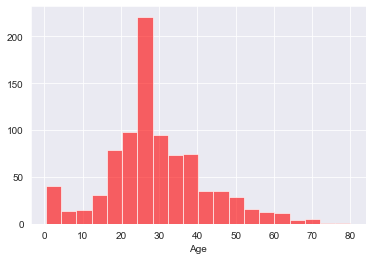

In [33]:
ax = titanic_age_byClass ['Age'].hist(bins=20, color='red', alpha=0.6)
ax.set(xlabel='Age')
plt.show()

> For KNN to work, we choose the variables we think are relevant and they all should be numeric.

In [34]:
titanic_KNN = titanic.copy(deep=True) #get a copy to try approach 2 on
cols = ['Survived', 'Fare', 'Sex', 'Age', 'Pclass', 'Embarked', 'SibSp','Parch']
titanic_KNN = titanic_KNN[cols]

In [35]:
# Approach 2

#One hot encoding
titanic_KNN = pd.get_dummies(titanic_KNN, columns=["Pclass","Embarked", "Sex"])

#imputer
imputer = KNNImputer(n_neighbors=2)
titanic_KNN = pd.DataFrame(imputer.fit_transform(titanic_KNN),columns = titanic_KNN.columns)

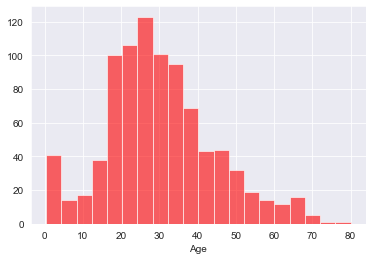

In [36]:
ax = titanic_KNN['Age'].hist(bins=20, color='red', alpha=0.6)
ax.set(xlabel='Age')
plt.show()

> We can see that the second approach produces better results

In [37]:
titanic['Age'] = titanic_KNN['Age']

In [38]:
#Check if there are still missing values 
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Drop Irrelevant Features

C:\Users\M5M\AppData\Local\Temp/ipykernel_17424/648379819.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot = True, ax=ax, cmap="YlGnBu");


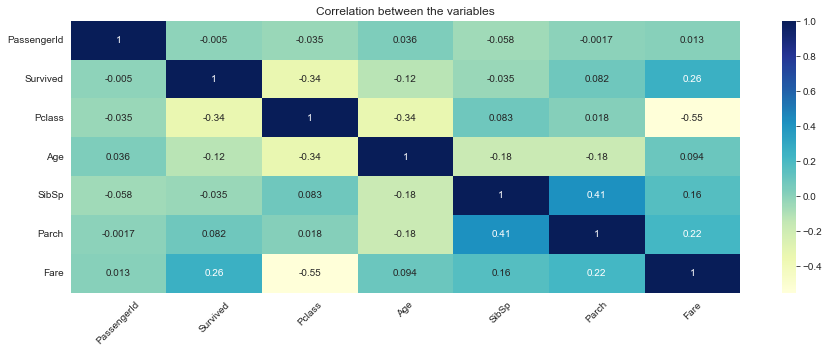

In [39]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
sns.heatmap(titanic.corr(), annot = True, ax=ax, cmap="YlGnBu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

**Observations:**
- Passenger ID and name couldn't possibly contribute to survival. 
- Survived is mostly correlated with Pclass abd Fare. 
- Survived is least correlated with passenger ID. 

**Note:**
We can extract the title from the passengers' names and encode them with ordinal encoding. This is because a passenger being Mr, Mrs, Miss, Master can contribute to their survival. **You can try doing that.**

In [40]:
titanic.drop(['PassengerId', 'Name'],inplace=True,axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


### What about the ticket column?

In [41]:
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [42]:
titanic.drop(['Ticket'],inplace=True,axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Deal with Categorical Data

### One hot encoding of categorical variables

In [43]:
titanic=pd.get_dummies(titanic, columns=["Pclass","Embarked", "Sex"])
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


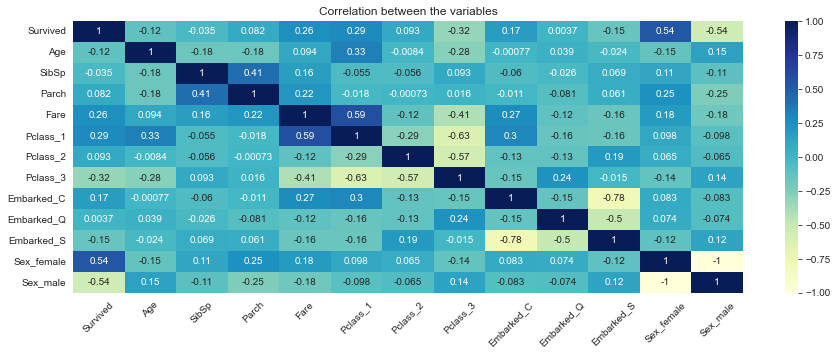

In [44]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
sns.heatmap(titanic.corr(), annot = True, ax=ax, cmap="YlGnBu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

In [45]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


# Training/Testing Models 

In [46]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle=True)


In [47]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [48]:
#cross validation between KNN and Logistic Regression

#KNN
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Average Score for KNN = {}%'.format(np.round(scores.mean()*100,2)))

#
clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Average Score for Logistic Regreesion = {}%'.format(np.round(scores.mean()*100,2)))

Average Score for KNN = 71.35%
Average Score for Logistic Regreesion = 80.9%


In [68]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(clf,X_train, y_train, scoring=scoring)
print(scores.keys())
sorted(scores['fit_time'])

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro'])


[0.002633333206176758,
 0.002983570098876953,
 0.0035419464111328125,
 0.005021095275878906,
 0.005033731460571289]

In [50]:
#Grid Search

#grid parameters to try
param_grid = {'penalty': ['l1', 'l2'],
             'C': np.arange(0.5, 3, 0.5).tolist(),
             'fit_intercept':[True, False]}

log_model = LogisticRegression(solver = 'liblinear', max_iter=150)
grid = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search=grid.fit(X_train, y_train)

In [51]:
#get the best parameters
print(grid_search.best_params_)
print('Best Acc = ', grid_search.best_score_*100)

{'C': 0.5, 'fit_intercept': False, 'penalty': 'l2'}
Best Acc =  81.32473160642174


In [52]:
#test 
y_pred = grid_search.best_estimator_.predict(X_test) 

acc = accuracy_score(y_pred, y_test)
print('Accuracy of Logistic Regression = {}%'.format(np.round(acc*100,2)))


Accuracy of Logistic Regression = 81.01%


In [53]:
confusion_matrix(y_test, y_pred)

array([[88, 11],
       [23, 57]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.84      0.71      0.77        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## What can we try to increase the accuracy?
- Different Models?
- Try other feature engineering techniques?
- Use different features?

### Feature Selection: Recursive Feature Elimination

**Feature selection** refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.


**RFE works by** searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.







RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.



In [55]:
model = LogisticRegression(solver = 'liblinear', max_iter=150)

rfe = RFE(estimator= model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
selected_features= list(X_train.columns[rfe.support_])

# summarize the selection of the attributes
print(selected_features)

['Pclass_3', 'Sex_female', 'Sex_male']


In [56]:
#split data based on the choosen features
X = titanic[selected_features]
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [57]:
#test
model.fit(X_train,y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Accuracy of Logistic Regression = {}%'.format(np.round(acc*100,2)))

Accuracy of Logistic Regression = 79.33%


Here the accuracy of the very small subset is very close to that of the whole training data. The tradeoff in this particular case is between slight improvement in accuracy and a huge reduction in feature dimensionality. 

# Task

In this task, you'll be working with the heart attack dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility) 
- Propose at least 2 questions about the dataset. (1 mark)
- Use visualizations and relations between variables to support your analysis in answering these questions. (4 marks)
- Perform any necessary cleaning steps. (2 marks)
- Fit a logistic regression model. (1 mark)
- Report model performance. (0.5 marks)
- Discuss your findings and observations. (1 mark)
- Discuss dataset limitations. (0.5 marks)
- 2 bonus marks for organized notebooks with detailed analysis and logical flow of conclusions. 

# References

- Hands-on Machine Learning with Scikit-learn, Keras & Tensorflow, 2nd Edition
- https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/ 
- https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python 
- https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
- https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python 
- https://github.com/MohamedAbdelsalam9/CIE417/blob/master/Tutorials/Lab3_Logistic_Regression/Lab3_Logistic_Regression_Solved.ipynb 
- https://machinelearningmastery.com/rfe-feature-selection-in-python/ 
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict
- https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d


# Part II

# Model Assessment

## Confusion Matrix

<img src="https://miro.medium.com/max/1400/1*AFh0ZojmvlUu_8hCQ2bsHA.png" align = 'center' style="width: 600px;">


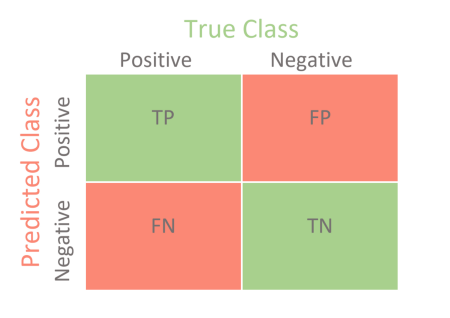

In [58]:
confusion_matrix(y_test, predictions)

array([[88, 11],
       [26, 54]], dtype=int64)

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. 

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)

## Accuracy

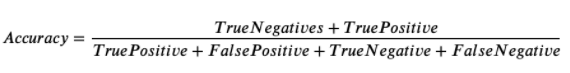

## Precision
**Out of those predicted positive, how many of them are actual positive?**

**Precision** is a good metric to use, when the costs of False Positive is high. For instance, email spam detection. <br>
In email spam detection, a false positive means that an email that is non-spam (negative) has been identified as spam (positive). The email user might lose important emails if the precision is not high for the spam detection model.

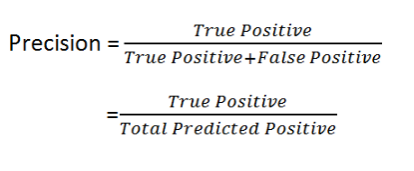

## Recall
**Recall** calculates how many of the Actual Positives our model captures. Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.

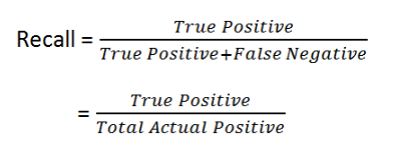

## F1 Score

It is often convenient to combine **precision** and **recall** into a single metric called the **F1 score**; in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.

As a result, the classifier will only get a high F1 score if both recall and precision are high.

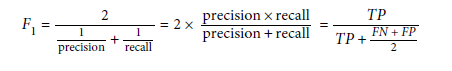

In [59]:
accuracy_score(y_test, predictions)

0.7932960893854749

In [60]:
precision_score(y_test, predictions)

0.8307692307692308

In [61]:
recall_score(y_test, predictions)

0.675

In [62]:
f1_score(y_test, predictions)

0.7448275862068966

## ROC AUC Curve

We can change the classification threshold to a value other than 0.5 depending on which class is more critical to classify correctly. This will result in a different number of false positives and negatives.


<img src="https://miro.medium.com/max/1400/1*AFh0ZojmvlUu_8hCQ2bsHA.png" align = 'center' style="width: 600px;">


> Another way to evaluate and compare your binary classifier is provided by the **ROC AUC Curve**. <br>
> It is a graph showing the performance of the classification model at all classification thresholds. It plots two parameters:
> 1. True Positive Rate (Recall) $$\frac{TP}{(TP+FN)}$$
> 2. False Positive Rate $$\frac{FP}{(TN+FP)}$$


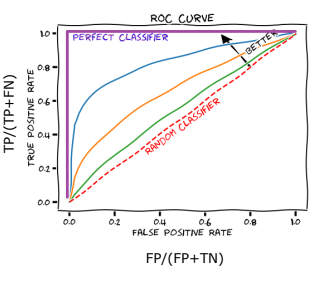

In [63]:
def plot_roc_curve(false_positive_rate, true_positive_rate):
    """ Function to plot the ROC curve
    """
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

[1.84490164 0.84490164 0.55992574 0.3133258  0.09630981]


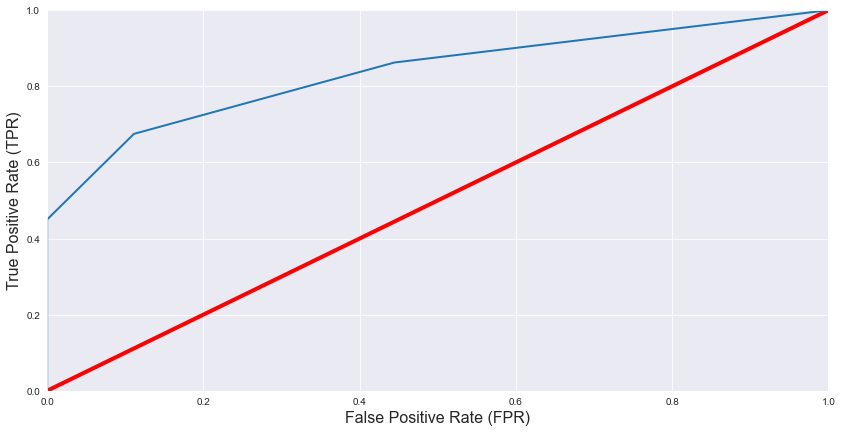

In [64]:
probs= model.predict_proba(X_test)[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
print(thresholds)

plt.figure(figsize=(14, 7))
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plot_roc_curve(false_positive_rate, true_positive_rate)

thresholds[0] represents no instances being predicted
    and is arbitrarily set to max(y_score) + 1

In [65]:
print("Thresholds: ", thresholds)
print('*******************************')
print("True positive rate: ", true_positive_rate)
print('*******************************')
print("False positive rate: ", false_positive_rate)

Thresholds:  [1.84490164 0.84490164 0.55992574 0.3133258  0.09630981]
*******************************
True positive rate:  [0.     0.45   0.675  0.8625 1.    ]
*******************************
False positive rate:  [0.         0.         0.11111111 0.44444444 1.        ]


The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible.

The top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

## ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

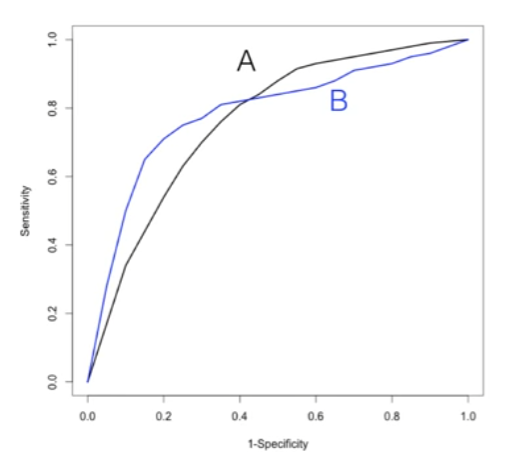

In [66]:
auc_score = roc_auc_score(y_test, probs)
print("ROC-AUC-Score:", auc_score)

ROC-AUC-Score: 0.8361111111111111


## Multiple ROC Curves

AUC score for logistic regression is  0.8361111111111111  and for KNN is  0.725


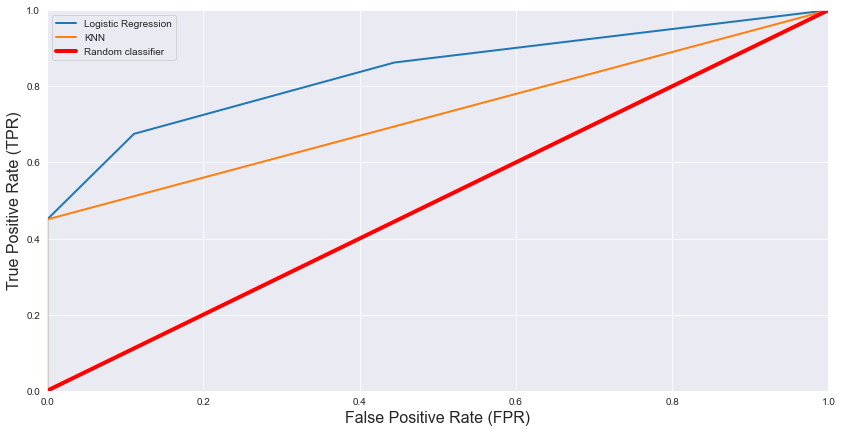

In [67]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train,y_train)

# compute true positive rate and false positive rate
fp1, tp1, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
fp2, tp2, thresholds = roc_curve(y_test, clf2.predict_proba(X_test)[:,1])

plt.figure(figsize=(14, 7))

plot_roc_curve(fp1, tp1)
plot_roc_curve(fp2, tp2)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)

plt.legend(['Logistic Regression', 'KNN', 'Random classifier'])

auc1 = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc2 = roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1])
print("AUC score for logistic regression is ", auc1, " and for KNN is ", auc2)

The AUC for logistic regression ROC is greater than the AUC for KNN ROC, suggesting that logistic regression is a better fit for this problem.

# Task

- Evaluate your logistic regression model (on heart attack daatset) from previous lab according to the evaluation metrics you learnt in this lab. Comment on each score and indicate whether or not you think the used metric is suitable for this particular problem. [5 marks] 

- Fit another classifier (i.e. KNN, decision trees,...) to the data and compare between its ROC curve and that of the logistic regression. [5 marks]

# References

https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

https://web.stanford.edu/~jurafsky/slp3/5.pdf

https://deepai.org/machine-learning-glossary-and-terms/softmax-layer

https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/